In [1]:
## IMPORTING RESOURCES AND LIBRARIES--------------------------------------------------------------------------------------------------
import numpy as np                                                   #- Importing NUMPY Library
import pandas as pd                                                  #- Importing PANDAS Library
from sklearn.datasets import load_iris                               #- Dataset Lib.
from sklearn.preprocessing import StandardScaler                     #- SKLEARN Standard Scaler
from sklearn.linear_model import LogisticRegression                  #- SKLEARN LogisticRegression
from sklearn.tree import DecisionTreeClassifier                      #- SKLEARN DecisionTreeClassifier     
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #- SKLEARN Linear Discriminant Analysis [LDA]
from sklearn.decomposition import PCA                                #- SKLEARN Principal Component Analysis [PCA]
from sklearn.decomposition import KernelPCA                          #- SKLEARN Kernel Principal Component Analysis [KPCA]
from sklearn.svm import SVC                                          #- SKLEARN SVC
from sklearn.neighbors import KNeighborsClassifier                   #- SKLEARN KNeighborsClassifier
from sklearn import metrics                                          #- SKLEARN metrics
from sklearn import model_selection                                  #- SKLEARN model_selection
from sklearn.model_selection import train_test_split                 #- SKLEARN train_test_split
from sklearn.naive_bayes import GaussianNB                           #- SKLEARN Gaussian Naive Bayes
from sklearn.model_selection import cross_val_score                  #- SKLEARN cross_val_score
import matplotlib.pyplot as plt                                      #- MATPLOTLIB for the graphs 
#%matplotlib inline                                                  #- INLINE resource for line plots
from sklearn.pipeline import make_pipeline                           #- SKLEARN resource for pipeline
from sklearn.ensemble import RandomForestClassifier                  #- SKLEARN resource for RandomForestClassifier
##------------------------------------------------------------------------------------------------------------------------------------
import subprocess
import sys

reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==')[0] for r in reqs.split()]
#print(installed_packages)

if 'mlxtend' not in installed_packages:
    !pip install mlxtend                                              #- Adding mlxtend Package
    print('mlxtend installed successfully')

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.plotting import plot_decision_regions
import warnings
##------------------------------------------------------------------------------------------------------------------------------------

In [2]:
# Importing Data
df = pd.read_csv('PhishingData.csv')
df.head()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,Age_of_domain,IP_address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [3]:
df.tail()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,Age_of_domain,IP_address,Result
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1
1352,1,0,1,1,1,0,-1,-1,0,-1


In [4]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (1353, 10)


In [5]:
df.isna().sum()

SFH               0
popUpWindow       0
SSLfinal_State    0
Request_URL       0
URL_of_Anchor     0
web_traffic       0
URL_Length        0
Age_of_domain     0
IP_address        0
Result            0
dtype: int64

In [6]:
# class distribution
print(df.groupby('Result').size())

Result
-1    702
 0    103
 1    548
dtype: int64


In [7]:
# descriptions
print(df.describe())

               SFH  popUpWindow  SSLfinal_State  Request_URL  URL_of_Anchor  \
count  1353.000000  1353.000000     1353.000000  1353.000000    1353.000000   
mean      0.237990    -0.258684        0.327421    -0.223208      -0.025129   
std       0.916389     0.679072        0.822193     0.799682       0.936262   
min      -1.000000    -1.000000       -1.000000    -1.000000      -1.000000   
25%      -1.000000    -1.000000        0.000000    -1.000000      -1.000000   
50%       1.000000     0.000000        1.000000     0.000000       0.000000   
75%       1.000000     0.000000        1.000000     0.000000       1.000000   
max       1.000000     1.000000        1.000000     1.000000       1.000000   

       web_traffic   URL_Length  Age_of_domain   IP_address       Result  
count  1353.000000  1353.000000    1353.000000  1353.000000  1353.000000  
mean      0.000000    -0.053215       0.219512     0.114560    -0.113821  
std       0.806776     0.762552       0.975970     0.318608    

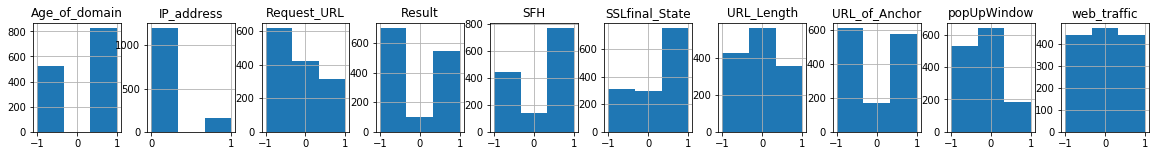

In [8]:
# histograms
df.hist( bins=3,figsize=(20,2),layout=(1,10))
plt.show()

In [9]:
y = df[['Result']]  # <<< In this example we are only going to use one target variable. We happen to choose Hinselmann.
X = df.iloc[:,:-1]
#X.shape
#y.shape

### Sequential feature selection - Forward

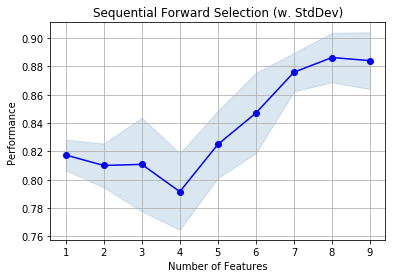

In [10]:
# Build RF classifier to use in feature selection   # REF. -https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
                                                    # REF. -https://www.kdnuggets.com/2018/06/step-forward-feature-selection-python.html
clf = KNeighborsClassifier(n_neighbors=3)

# Build step forward feature selection
mysfs1 = sfs(clf,k_features=9,forward=True,floating=False,scoring='accuracy',cv=5)

# Perform SFFS
mysfs1 = mysfs1.fit(X, y.values.ravel())

afig = plot_sfs(mysfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

## According to the graph between "5 - 8" features will be good enough to achive best perfomance on our classification.

### Sequential feature selection - Backward

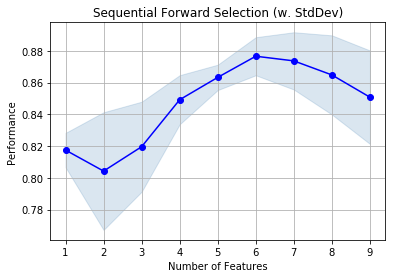

In [11]:
StandardSc=StandardScaler()    
X_std = StandardSc.fit_transform(X)

# Build step forward feature selection
mysbs1 = sfs(clf,k_features=1,forward=False,floating=False,scoring='accuracy',cv=5)

# Perform SFFS
mysbs1 = mysbs1.fit(X_std, y.values.ravel())

afig = plot_sfs(mysbs1.get_metric_dict())
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

## According to the graph 6 features will be good enough to achive best perfomance on our classification.

### Sequential feature selection - Forward

In [12]:
knn=KNeighborsClassifier()
knn.fit(X, y.values.ravel())
# Build step forward feature selection
aSFS = sfs(clf,k_features=6,forward=True,floating=False,scoring='accuracy',cv=5)

# Perform SFFS
aSFS = aSFS.fit(X, y.values.ravel())



for idx in aSFS.k_feature_idx_:
    print(df.columns[idx])
    

print("\n")
print(aSFS.k_feature_idx_)
#print("\n")
#print('Accuracy:',knn.score(X, y.values.ravel()))

SFH
SSLfinal_State
Request_URL
URL_of_Anchor
web_traffic
IP_address


(0, 2, 3, 4, 5, 8)


### Sequential feature selection - Backward

In [13]:
# Build RF classifier to use in feature selection   # REF. -https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
                                                    # REF. -https://www.kdnuggets.com/2018/06/step-forward-feature-selection-python.html
knn.fit(X_std, y.values.ravel())
clf = KNeighborsClassifier(n_neighbors=5)

# Build step forward feature selection
bSBS = sfs(clf,k_features=6,forward=False,floating=False,verbose=0,scoring='accuracy',cv=5)

# Perform SFFS
bSBS = bSBS.fit(X_std, y.values.ravel())


for idx in bSBS.k_feature_idx_:
    print(df.columns[idx])
    
print("\n")
print(bSBS.k_feature_idx_)
print("\n")
print('Accuracy:',knn.score(X_std, y.values.ravel()))

SFH
popUpWindow
SSLfinal_State
Request_URL
URL_of_Anchor
URL_Length


(0, 1, 2, 3, 4, 6)


Accuracy: 0.9068736141906873


## Both algorith match on first 4/6 features.

### Assessing feature importance with random Forests

#### Random Forest is an ensemble of decision trees. It can solve both regression and classification problems with large data sets. It also helps identify most significant variables from thousands of input variables.

 1) SFH                            0.341221
 2) SSLfinal_State                 0.170765
 3) popUpWindow                    0.121742
 4) Request_URL                    0.099035
 5) URL_of_Anchor                  0.093860
 6) URL_Length                     0.077789
 7) web_traffic                    0.055435
 8) Age_of_domain                  0.026492
 9) IP_address                     0.013661


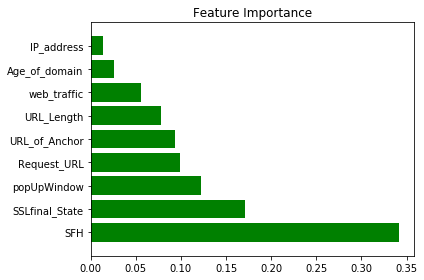

In [14]:
feat_labels=X.columns.values

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X,y.values.ravel())
importances=forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%2d) % -*s %f" %(f +1 , 30,feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')    

plt.barh(range(X.shape[1]),importances[indices],align='center',color='green')
plt.yticks(range(X.shape[1]),feat_labels[indices])
plt.ylim([-1,X.shape[1]])

plt.tight_layout()
plt.show()

## Feature importance with Random Forests method provide exact same results as Backward Selection.

### Scores per algorithm using PCA Dimensionality Reduction Method

#### Principal component analysis provides dimensionality reduction. Sometimes you have a wide range of features, probably highly correlated between each other, and models can easily overfit on a huge amount of data.

In [15]:
# prepare configuration for cross validation test harness   # REF. -https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
# prepare models

models = []
models.append(('Logistic Regression        [LR]   ', LogisticRegression(random_state=1)))
models.append(('Logistic Regression(Reg.L1)[LR-l1]', LogisticRegression(penalty='l1',random_state=1)))
models.append(('Logistic Regression(Reg.L2)[LR-l2]', LogisticRegression(penalty='l2',random_state=1)))
models.append(('Decision Tree Classifier   [DT]   ', DecisionTreeClassifier(random_state=1)))
models.append(('Support Vector Classifier  [SVC]  ', SVC(kernel = 'linear',random_state=1)))
models.append(('Kernel SVC                 [KSVC] ', SVC(kernel = 'rbf', random_state=1)))
models.append(('KNeighbors Classifier      [KNN]  ', KNeighborsClassifier(n_neighbors=5)))
models.append(('GaussianNB                 [GNB]  ', GaussianNB()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=5)
    pipe_lr= make_pipeline(StandardScaler(),PCA(n_components=2),model)
    cv_results = cross_val_score(pipe_lr,X,y.values.ravel(),scoring=scoring,cv=kfold,n_jobs=-1)
    #results.append(cv_results)
    names.append(name) 
    print("%s: %f " % (name, cv_results.mean()))

Logistic Regression        [LR]   : 0.797522 
Logistic Regression(Reg.L1)[LR-l1]: 0.798257 
Logistic Regression(Reg.L2)[LR-l2]: 0.797522 
Decision Tree Classifier   [DT]   : 0.822696 
Support Vector Classifier  [SVC]  : 0.798998 
Kernel SVC                 [KSVC] : 0.801225 
KNeighbors Classifier      [KNN]  : 0.771683 
GaussianNB                 [GNB]  : 0.793851 


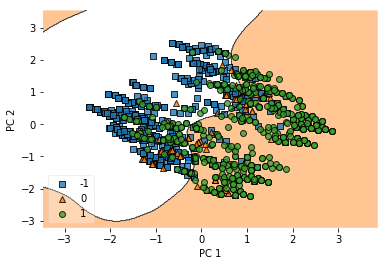

In [16]:
clf1 = SVC(kernel = 'rbf', random_state=1)
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
clf1.fit(X2, y.values.ravel())

plot_decision_regions(X2, y.values.ravel(), clf=clf1, legend=3)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### Scores per algorithm using LDA Dimensionality Reduction Method

In [17]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=5)
    pipe_lr= make_pipeline(StandardScaler(),LinearDiscriminantAnalysis(n_components=2),model)
    cv_results = cross_val_score(pipe_lr,X,y.values.ravel(),scoring=scoring,cv=kfold,n_jobs=-1)
    #results.append(cv_results)
    names.append(name)
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

Logistic Regression        [LR]   : 0.823382 
Logistic Regression(Reg.L1)[LR-l1]: 0.823382 
Logistic Regression(Reg.L2)[LR-l2]: 0.823382 
Decision Tree Classifier   [DT]   : 0.834542 
Support Vector Classifier  [SVC]  : 0.821923 
Kernel SVC                 [KSVC] : 0.831536 
KNeighbors Classifier      [KNN]  : 0.813840 
GaussianNB                 [GNB]  : 0.824880 


### Scores per algorithm using KPCA Dimensionality Reduction Method

In [18]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=5)
    pipe_lr= make_pipeline(StandardScaler(),KernelPCA(n_components=2, kernel='rbf'),model)
    cv_results = cross_val_score(pipe_lr,X,y.values.ravel(),scoring=scoring,cv=kfold,n_jobs=-1)
    #results.append(cv_results)
    names.append(name)
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

Logistic Regression        [LR]   : 0.784221 
Logistic Regression(Reg.L1)[LR-l1]: 0.790131 
Logistic Regression(Reg.L2)[LR-l2]: 0.784221 
Decision Tree Classifier   [DT]   : 0.791618 
Support Vector Classifier  [SVC]  : 0.784951 
Kernel SVC                 [KSVC] : 0.788644 
KNeighbors Classifier      [KNN]  : 0.774586 
GaussianNB                 [GNB]  : 0.788682 


# Best score achived: 

-  Decision Tree Classifier   [DT]   : 0.84 via LDA